In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, max_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
from matplotlib.ticker import FuncFormatter
import time

In [ ]:
# Loading Dataset
data_path = '/content/Final_merged_data.csv'
df = pd.read_csv(data_path)

In [ ]:
# Dropping 'Country' column since it contains only one unique value ('Indonesia')
df_processed = df.drop('Country', axis=1)

In [ ]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   720 non-null    int64  
 1   Item                   720 non-null    object 
 2   Rainfall (mm)          720 non-null    float64
 3   Temperature (Celcius)  720 non-null    float64
 4   Yield (hg/ha)          720 non-null    int64  
 5   Pesticides (Tons)      720 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 33.9+ KB


In [ ]:
df_processed.describe()

,Year,Rainfall (mm),Temperature (Celcius),Yield (hg/ha),Pesticides (Tons)
count,720.000000,720.000000,720.000000,7.200000e+02,720.000000
mean,2015.500000,169.913194,26.733333,1.355161e+05,276415.640000
std,3.454452,40.060258,0.170085,2.171315e+05,40694.310061
min,2010.000000,99.100000,26.500000,6.840000e+02,206061.700000
25%,2012.750000,129.493750,26.600000,8.886250e+03,254547.252500
50%,2015.500000,176.741667,26.700000,6.233450e+04,276713.360000
75%,2018.250000,195.787500,26.825000,1.562635e+05,313211.652500
max,2021.000000,235.958333,27.100000,1.292117e+06,349797.630000


In [ ]:
len(df_processed.Year.unique())

12

In [ ]:
# Separating target variable and features
X = df_processed.drop('Yield (hg/ha)', axis = 1)
y = df_processed['Yield (hg/ha)']

In [ ]:
# Perform one-hot encoding on the 'Item' column
X_encoded = pd.get_dummies(X, columns=['Item'])

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [ ]:
# Create RandomForestRegressor model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
# Training the RandomForestRegressor model
start_training_time = time.time()
rf_reg.fit(X_train, y_train)
end_training_time = time.time()
training_time = end_training_time - start_training_time

In [ ]:
# Make predictions
start_prediction_time = time.time()
y_pred_rf = rf_reg.predict(X_test)
end_prediction_time = time.time()
prediction_time = end_prediction_time - start_prediction_time

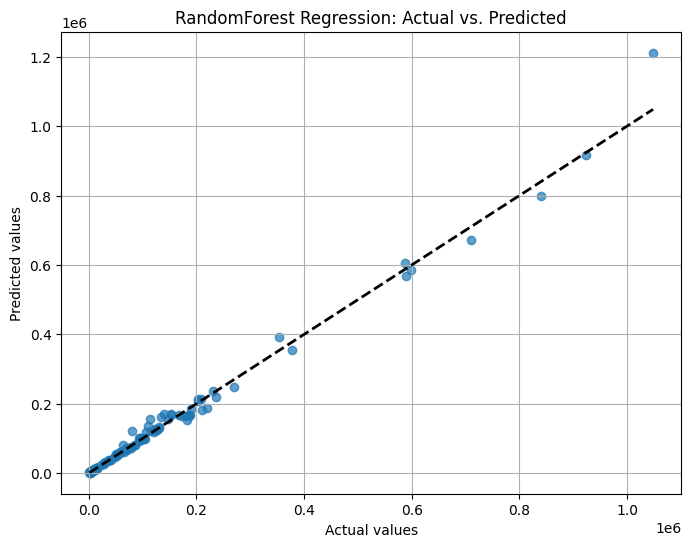

In [ ]:
# Visualization - Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.7)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('RandomForest Regression: Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line for reference
plt.grid(True)
plt.show()

In [ ]:
# Displaying evaluation metrics and time taken
r2 = r2_score(y_test, y_pred_rf)
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = mean_squared_error(y_test, y_pred_rf, squared=False)
max_err = max_error(y_test, y_pred_rf)
mape = mean_absolute_percentage_error(y_test, y_pred_rf)

print(f"R-squared (R2): {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Max Error: {max_err:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

print(f"Training Time: {training_time:.2f} seconds")
print(f"Prediction Time: {prediction_time:.5f} seconds")

R-squared (R2): 0.99
Mean Absolute Error (MAE): 6838.95
Mean Squared Error (MSE): 316844998.43
Root Mean Squared Error (RMSE): 17800.14
Max Error: 163153.56
Mean Absolute Percentage Error (MAPE): 0.07%
Training Time: 2.06 seconds
Prediction Time: 0.02843 seconds
